# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Lailah\\vscode-project\\DA 1 Assessment\\medical_insurance_data_analysis'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [12]:
df=pd.read_csv('./Data/Clean_Data/cleaned_data.csv')
df.head(8)

,age,sex,bmi,weight_category,children,smoker,region,charges,sex_male,smoker_yes,region_encoded
0,19.0,female,3.328627,Overweight,0.0,yes,southwest,9.734176,0.0,1.0,3.0
1,18.0,male,3.519573,Obese,1.0,no,southeast,7.453302,1.0,0.0,2.0
2,28.0,male,3.496508,Obese,3.0,no,southeast,8.400538,1.0,0.0,2.0
3,33.0,male,3.122585,Healthy,0.0,no,northwest,9.998092,1.0,0.0,1.0
4,32.0,male,3.363149,Overweight,0.0,no,northwest,8.260197,1.0,0.0,1.0
5,31.0,female,3.248046,Overweight,0.0,no,southeast,8.231275,0.0,0.0,2.0
6,46.0,female,3.509753,Obese,1.0,no,southeast,9.016827,0.0,0.0,2.0
7,37.0,female,3.322875,Overweight,3.0,no,northwest,8.893093,0.0,0.0,1.0


# Data Visualisation #

**Bivariate Analysis with Categorical Variables**
* Looking at how the categorical data ('Children', 'Smoker', 'Sex') influence insurance charges

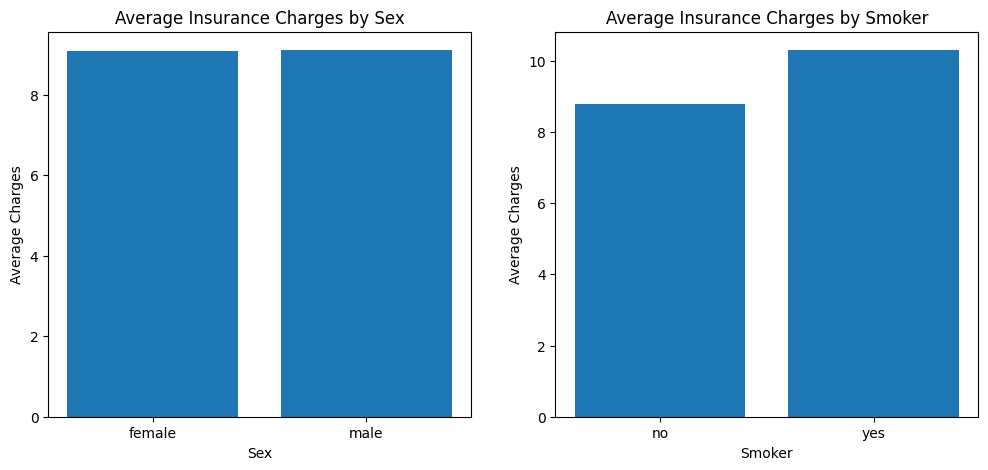

In [40]:
sex_charges = df.groupby('sex')['charges'].mean()
smoker_charges = df.groupby('smoker')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=sex_charges.index, height=sex_charges)
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Sex')

axes[1].bar(x=smoker_charges.index, height=smoker_charges)
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Smoker')

plt.show()

Text(0.5, 1.0, 'Average Insurance Charges by Region')

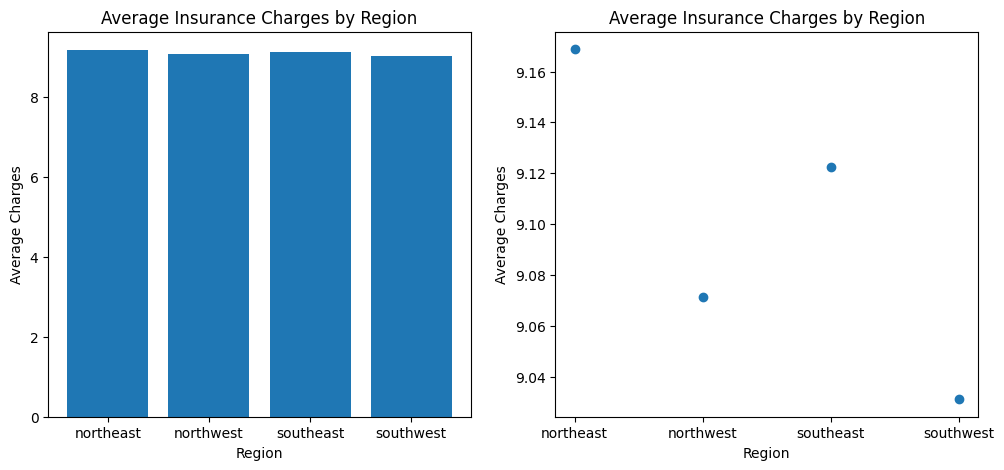

In [56]:
region_charges = df.groupby('region')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=region_charges.index, height=region_charges)
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Region')

axes[1].scatter(x=region_charges.index, y=region_charges)
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Region')

Text(0.5, 1.0, 'Average Insurance Charges by Number of Children')

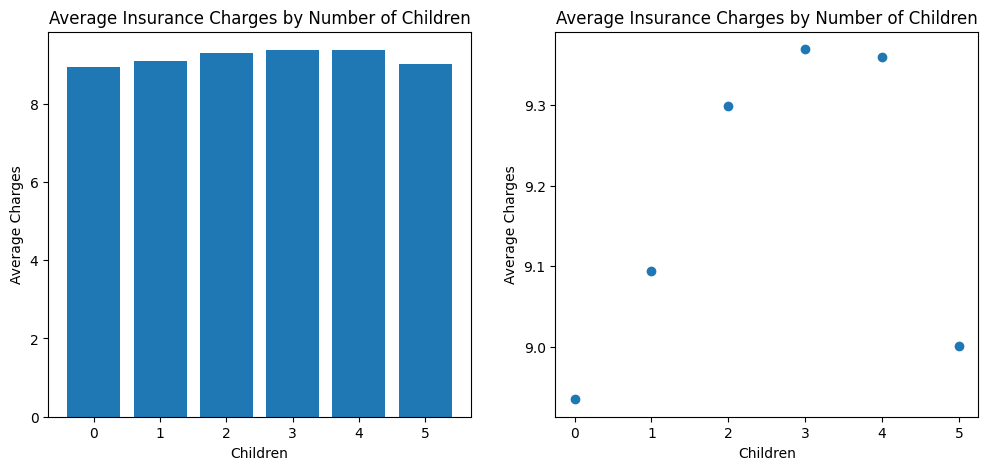

In [58]:
children_charges_charges = df.groupby('children')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=children_charges_charges.index, height=children_charges_charges)
axes[0].set_xlabel('Children')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Number of Children')

axes[1].scatter(x=children_charges_charges.index, y=children_charges_charges)
axes[1].set_xlabel('Children')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Number of Children')

C:\Users\Lailah\AppData\Local\Temp\ipykernel_37936\3099700574.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_category_charges = df.groupby('weight_category')['charges'].mean()
C:\Users\Lailah\AppData\Local\Temp\ipykernel_37936\3099700574.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_category_charges = df.groupby('weight_category')['charges'].mean()


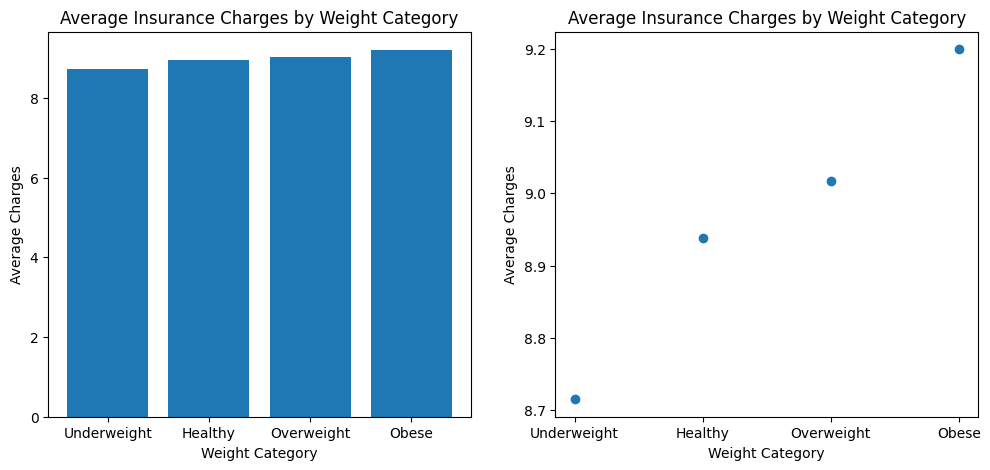

In [ ]:
weight_category_charges = df.groupby('weight_category')['charges'].mean()
weight_category_charges_charges = df.groupby('smoker')['charges'].mean()

# Step 1: Define the desired order for the weight categories
desired_order = ['Underweight', 'Healthy', 'Overweight', 'Obese', 'Severely Obese']

# Step 2: Make sure weight_category is treated as a categorical variable with that order
df['weight_category'] = pd.Categorical(df['weight_category'], categories=desired_order, ordered=True)

# Step 3: Reindex to enforce the order (optional if step 2 is done correctly, but safe to include)
weight_category_charges = weight_category_charges.reindex(desired_order)

weight_category_charges = df.groupby('weight_category')['charges'].mean()
fig,axes=plt.subplots(1, 2, figsize=(12,5))
axes[0].bar(x=weight_category_charges.index, height=weight_category_charges)
axes[0].set_xlabel('Weight Category')
axes[0].set_ylabel('Average Charges')
axes[0].set_title('Average Insurance Charges by Weight Category')

axes[1].scatter(x=weight_category_charges.index, y=weight_category_charges)
axes[1].set_xlabel('Weight Category')
axes[1].set_ylabel('Average Charges')
axes[1].set_title('Average Insurance Charges by Weight Category')


plt.show()

The data shows smokers pay more, on average, than non-smokers which backs up the hypothesis. 
Although men and women incur similar average insurance charges overall, I will investigate how gender interacts with other variables to influence costs.

Different regions on average incure the same insurance charges. 
when it comes to number of children there is a somewhat proportional relationship as number of childrens increases so does the average insurance charge up to a point.

**Bivariate Analysis with Numerical Variables**

* Looking at how the numerical variables ('bmi', 'age') influence insurance charges